# Ford GoBike Data exploration
## by Amenah AlShahrani
### Introduction
 Ford GoBike has increasingly gained popularity as one of the best bike sharing facilitator present in the United States. In this report we would focus on the customer behaviour which would help us understand our target customer. We would also be seeing the duration of trips and other essential targets such as the station's to understand more.

### Preliminary Wrangling
Our analysis uses the data pertaining to trips on Ford GoBike for the month of August 2018. Our major aim is to understand the following.

- When are most trips taken in terms of time of day of the week
- Does the above depend on if a user is a subscriber or customer?
- Who should be our target customers ? In terms of advertising , who are our target audience ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('201905-baywheels-tripdata.csv')

In [3]:
df.shape

(182163, 16)

In [4]:
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990.0,Female,No
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994.0,Male,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182163 entries, 0 to 182162
Data columns (total 16 columns):
duration_sec               182163 non-null int64
start_time                 182163 non-null object
end_time                   182163 non-null object
start_station_id           182148 non-null float64
start_station_name         182148 non-null object
start_station_latitude     182163 non-null float64
start_station_longitude    182163 non-null float64
end_station_id             182148 non-null float64
end_station_name           182148 non-null object
end_station_latitude       182163 non-null float64
end_station_longitude      182163 non-null float64
bike_id                    182163 non-null int64
user_type                  182163 non-null object
member_birth_year          173694 non-null float64
member_gender              173697 non-null object
bike_share_for_all_trip    182163 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.2+ MB


In [8]:
df['member_age'] = 2019 - df['member_birth_year']

In [9]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,48877,2019-05-31 20:34:56.8110,2019-06-01 10:09:34.7960,321.0,5th St at Folsom,37.780146,-122.403071,60.0,8th St at Ringold St,37.774520,-122.409449,1416,Customer,1990.0,Female,No,29.0
1,47050,2019-05-31 19:43:56.1960,2019-06-01 08:48:06.9190,246.0,Berkeley Civic Center,37.869060,-122.270556,266.0,Parker St at Fulton St,37.862464,-122.264791,1797,Subscriber,1994.0,Male,No,25.0
2,5912,2019-05-31 23:54:24.0890,2019-06-01 01:32:56.9820,149.0,Emeryville Town Hall,37.831275,-122.285633,149.0,Emeryville Town Hall,37.831275,-122.285633,3612,Customer,1988.0,Male,No,31.0
3,2629,2019-05-31 23:59:57.4490,2019-06-01 00:43:46.8740,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,2333,Customer,1998.0,Male,No,21.0
4,4235,2019-05-31 23:05:48.9320,2019-06-01 00:16:24.4570,34.0,Father Alfred E Boeddeker Park,37.783988,-122.412408,368.0,Myrtle St at Polk St,37.785434,-122.419622,181,Subscriber,1967.0,Male,No,52.0


In [10]:
df.describe(include = 'all')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
count,182163.000000,182163,182163,182148.000000,182148,182163.000000,182163.000000,182148.000000,182148,182163.000000,182163.000000,182163.000000,182163,173694.000000,173697,182163,173694.000000
unique,NaN,182145,182149,NaN,366,NaN,NaN,NaN,367,NaN,NaN,NaN,2,NaN,3,2,NaN
top,NaN,2019-05-04 08:45:42.9940,2019-05-13 08:10:11.2650,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,San Francisco Caltrain Station 2 (Townsend St...,NaN,NaN,NaN,Subscriber,NaN,Male,No,NaN
freq,NaN,2,2,NaN,4018,NaN,NaN,NaN,6365,NaN,NaN,NaN,156669,NaN,130227,166018,NaN
mean,792.261744,NaN,NaN,141.369480,NaN,37.763583,-122.346701,139.308118,NaN,37.763770,-122.345875,1964.698753,NaN,1984.383260,NaN,NaN,34.616740
std,1824.190023,NaN,NaN,117.435373,NaN,0.112150,0.129110,117.210619,NaN,0.111985,0.128349,1136.197266,NaN,10.299198,NaN,NaN,10.299198
min,61.000000,NaN,NaN,3.000000,NaN,37.311284,-122.453704,3.000000,NaN,37.311284,-122.453704,12.000000,NaN,1896.000000,NaN,NaN,18.000000
25%,357.000000,NaN,NaN,44.000000,NaN,37.770030,-122.411738,42.000000,NaN,37.770407,-122.410662,1025.000000,NaN,1980.000000,NaN,NaN,27.000000
50%,568.000000,NaN,NaN,101.000000,NaN,37.780526,-122.397437,98.000000,NaN,37.780955,-122.396906,1930.000000,NaN,1987.000000,NaN,NaN,32.000000
75%,882.000000,NaN,NaN,240.000000,NaN,37.796248,-122.285171,238.000000,NaN,37.797280,-122.288665,2977.000000,NaN,1992.000000,NaN,NaN,39.000000


In [11]:
pd.DataFrame(((df.count()-df.isnull().sum())/df.count())*100 , columns=['Coverage'])

,Coverage
duration_sec,100.000000
start_time,100.000000
end_time,100.000000
start_station_id,99.991765
start_station_name,99.991765
start_station_latitude,100.000000
start_station_longitude,100.000000
end_station_id,99.991765
end_station_name,99.991765
end_station_latitude,100.000000


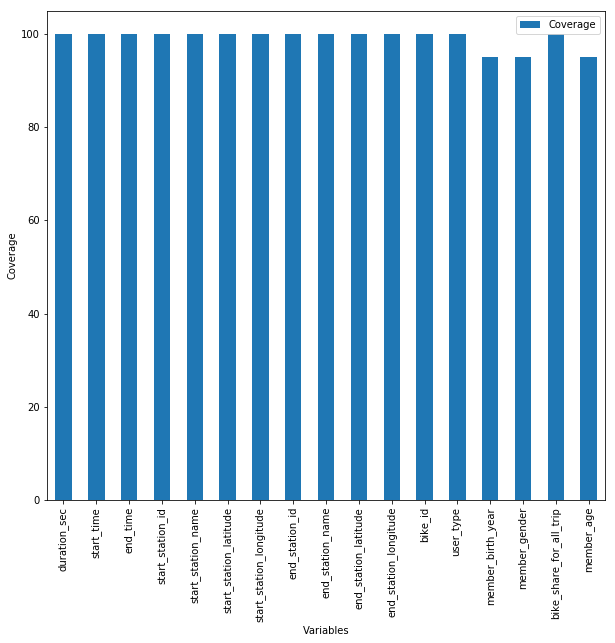

In [12]:
ax = pd.DataFrame(((df.count()-df.isnull().sum())/df.count())*100 , columns=['Coverage']).plot(kind = 'bar' , figsize = (10,9))
ax.set(xlabel = 'Variables' , ylabel = 'Coverage')
plt.show()

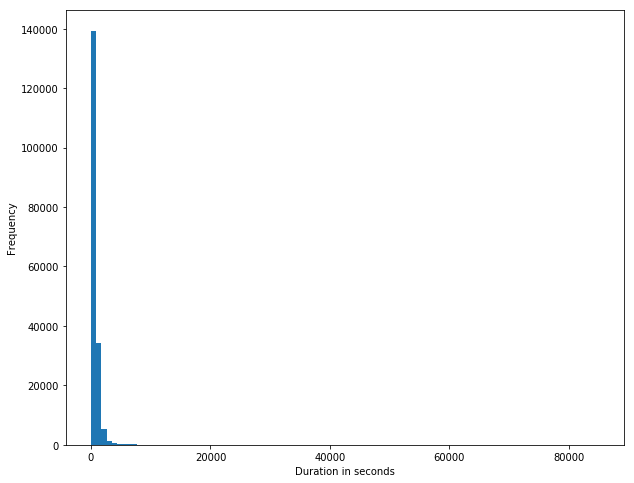

In [13]:
df['duration_sec'].plot.hist(bins = 100 , figsize = (10 , 8)).set(xlabel = 'Duration in seconds')
plt.show()

In [14]:
df['duration_sec'].describe().to_frame()

,duration_sec
count,182163.000000
mean,792.261744
std,1824.190023
min,61.000000
25%,357.000000
50%,568.000000
75%,882.000000
max,84967.000000


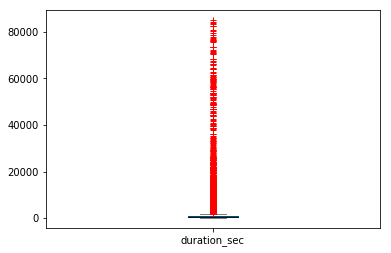

In [15]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
df['duration_sec'].plot.box(color = color , sym = 'r+')
plt.show()

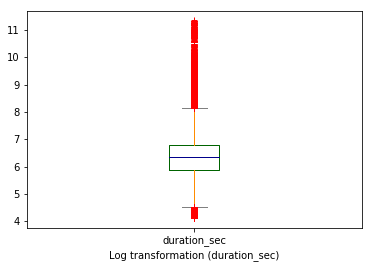

In [16]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
np.log(df['duration_sec']).plot.box(color = color , sym = 'r+').set(xlabel = 'Log transformation (duration_sec)')
plt.show()

In [17]:
print("Length of duration below 5000 :-  " +
      str(df.query('duration_sec < 5000').shape[0]))
print("Length of duration above 10000 and below 200000 :-  " +
      str(df.query('duration_sec > 10000 and duration_sec < 20000').shape[0]))
print("Length of duration above 20000 and below 300000 :-  " +
      str(df.query('duration_sec > 20000 and duration_sec < 30000').shape[0]))
print("Length of duration above 30000 and below 400000 :-  " +
      str(df.query('duration_sec > 30000 and duration_sec < 40000').shape[0]))
print("Length of duration above 40000 and below 500000 :-  " +
      str(df.query('duration_sec > 40000 and duration_sec < 50000').shape[0]))
print("Length of duration above 50000  :-  " +
      str(df.query('duration_sec > 50000').shape[0])) 

print('total sample length :- ' + str(df.shape[0]))

Length of duration below 5000 :-  180915
Length of duration above 10000 and below 200000 :-  265
Length of duration above 20000 and below 300000 :-  92
Length of duration above 30000 and below 400000 :-  26
Length of duration above 40000 and below 500000 :-  29
Length of duration above 50000  :-  82
total sample length :- 182163


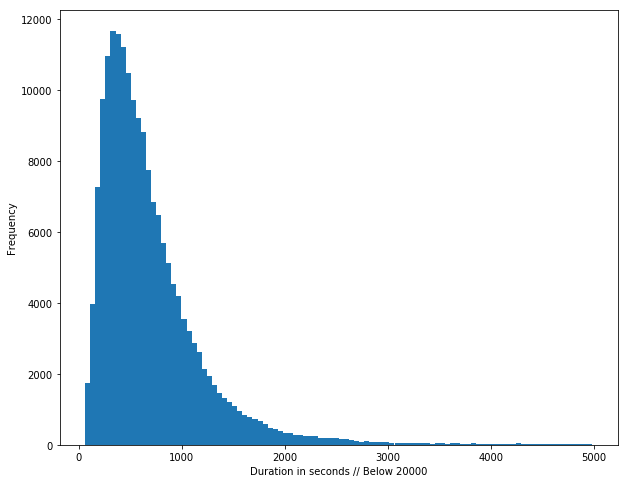

In [19]:
df.query('duration_sec < 5000')['duration_sec'].plot.hist(bins = 100 ,figsize = (10 , 8)).set(xlabel = 'Duration in seconds // Below 20000')
plt.show()

In [20]:
df.query('duration_sec < 5000')['duration_sec'].describe().to_frame()

,duration_sec
count,180915.000000
mean,695.680745
std,521.087188
min,61.000000
25%,356.000000
50%,565.000000
75%,873.500000
max,4988.000000


In [21]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df[['start_time','end_time']].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [22]:
print(df['start_time'].dt.month.value_counts())
print(df['end_time'].dt.month.value_counts())

5    182163
Name: start_time, dtype: int64
5    182150
6        13
Name: end_time, dtype: int64


In [23]:
df = df[df['end_time'].dt.month == 5]

In [24]:
df.shape

(182150, 17)

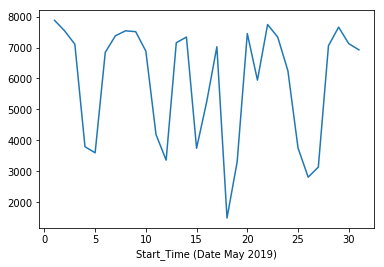

In [25]:
a = df.start_time.dt.day.value_counts().sort_index().plot(kind = 'line').set(xlabel = 'Start_Time (Date May 2019)')

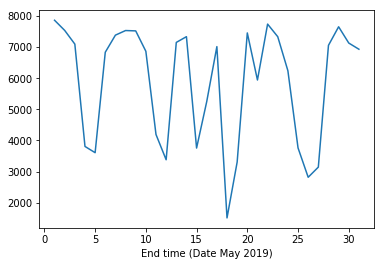

In [26]:
b = df.end_time.dt.day.value_counts().sort_index().plot(kind = 'line').set(xlabel = 'End time (Date May 2019)')

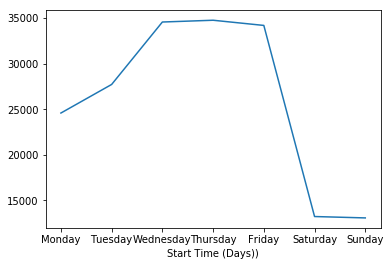

In [27]:
## A list of days in the order that you need them:
dayofweek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']   

## Name the series to be plotted (allows you to access the index later):
day_counts = df.start_time.dt.dayofweek.map(dayofweek).value_counts()

## Re order the series index:
day_counts = day_counts.reindex(index = days)

## Plot the series:
a = day_counts.plot(kind = 'line')

# use index as tick labels
a.set_xticks(range(len(day_counts.index)))
a.set_xticklabels(day_counts.index)
a.set_xlabel('Start Time (Days))')
plt.show()

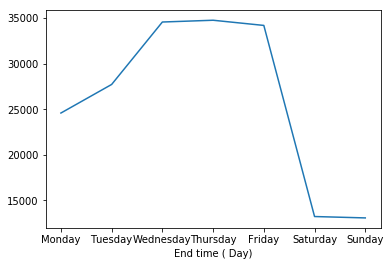

In [28]:
## Name the series to be plotted (allows you to access the index later):
day_counts = df.start_time.dt.dayofweek.map(dayofweek).value_counts()
day_counts = day_counts.reindex(index = days)
## Plot the series:
a = day_counts.plot(kind = 'line')

# use index as tick labels
a.set_xticks(range(len(day_counts.index)))
a.set_xticklabels(day_counts.index)
a.set_xlabel('End time ( Day)')
plt.show()

In [29]:
df['weekday_start'] = df.start_time.dt.dayofweek.map(dayofweek)
df['weekday_end'] = df.end_time.dt.dayofweek.map(dayofweek)

**We can very well infer the following :**
- There seems to be a trend in the ride share.
- This enabled us to look closely towards the day of week which showed a increase in rentals on the mid week as compared to the weekend.
This brings us to the next section , **Which stations had the highest rental ?**

In [30]:
len(df['start_station_name'].value_counts())

366

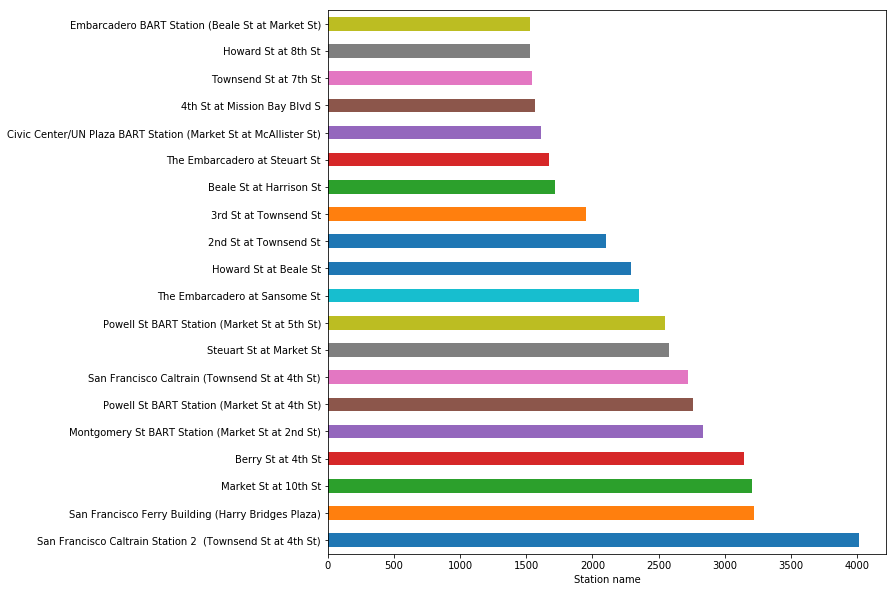

In [31]:
df['start_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' ,
                                                                                 figsize = (10,10)).set(xlabel = 'Station name')
plt.show()


In [32]:
len(df['end_station_name'].value_counts())

367

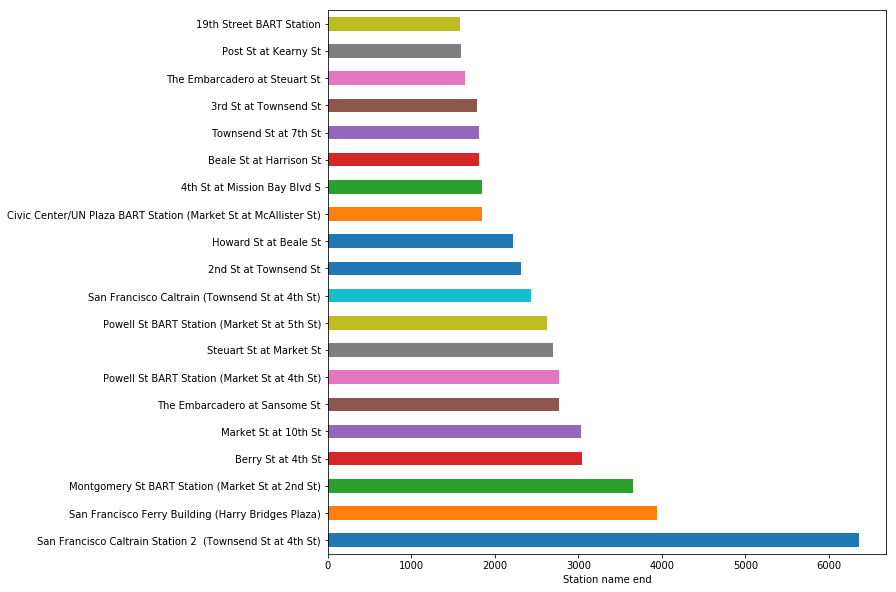

In [33]:
df['end_station_name'].value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' 
                                                                               , figsize = (10,10)).set(xlabel = 'Station name end')
plt.show()

California Station 2 (Townsend St at 4th St) Seems to be the most popular among all It's the highest for the start as well as end station. Townsend street is well known and has many offices in the nearby places maybe that's a reason!

Before we move to the next plot , We have ignored the following variables (Start_station_id , end_station_latitude , end_station_longitude , start_station_latitude , start_station_longitude , end_station_id) Since they point towards the station name. We may look at the coordinates in the Bivariate section

This brings us to our next section , **Who are our users ?**

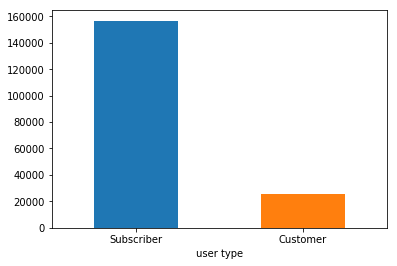

In [38]:
(df.user_type.value_counts().plot(kind = 'bar' , rot = 0).set(xlabel = 'user type'))
plt.show()

__Who are our users ? What is their gender ? Is there any trend which is observed ?__

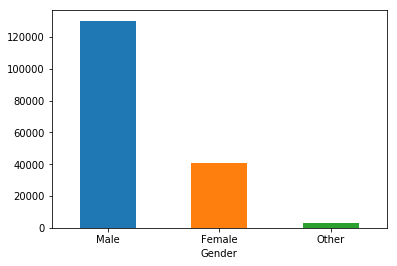

In [39]:
(df.member_gender.value_counts().plot(kind = 'bar',rot = 0).set(xlabel = 'Gender'))
plt.show()

__What about their age and , when did they come to existance in our planet ?__

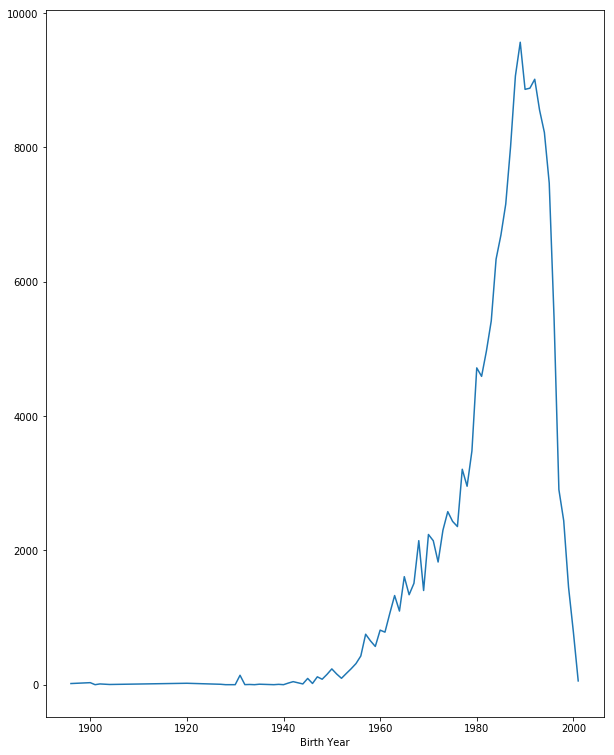

In [40]:
(df.member_birth_year.value_counts().sort_index().plot(kind = 'line' , figsize = (10,13)).set(xlabel = 'Birth Year'))
plt.show()

Most of our users belong to the late 80's and 90's generation. Which can now be seen below in terms of age

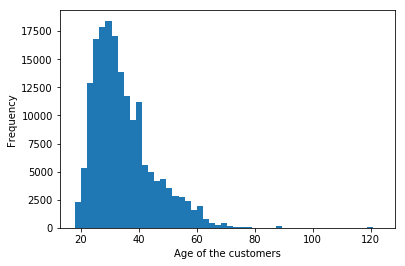

In [41]:
df['member_age'].plot(kind = 'hist' , bins = 50).set(xlabel = 'Age of the customers')
plt.show()

__The following brings us to our next question Does everyone share their rides?__

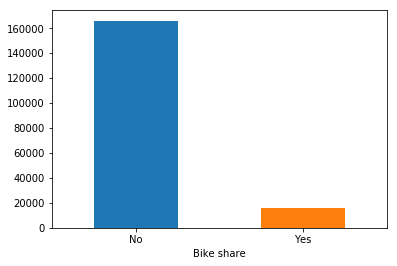

In [42]:
df['bike_share_for_all_trip'].value_counts().plot(kind = 'bar' , rot = 0).set(xlabel = 'Bike share')
plt.show()

Answer ? No!

#### The following were observed :

- Most of our users were Subscribers (Hence recurring rides)
- From the data available to us , We found that we have a lot of Male users
- Age is just a number , However we say that people in their late 20s and 30s tend to use our services a lot
- Well , No they dont share the ride

Let's take a look at this very interesting section. We can actually check the correlation.

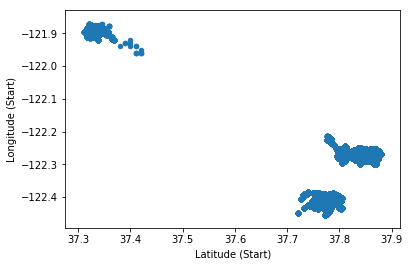

In [43]:
df.plot(kind = 'scatter' , x= 'start_station_latitude' ,
        y= 'start_station_longitude').set(xlabel = 'Latitude (Start)' , ylabel = 'Longitude (Start)')
plt.show()

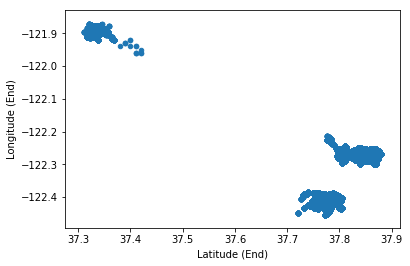

In [44]:
df.plot(kind = 'scatter' , x= 'end_station_latitude' ,
        y= 'end_station_longitude').set(xlabel = 'Latitude (End)' , ylabel = 'Longitude (End)')
plt.show()

**Nothing concrete here , Hence we can ignore the latitude and longitude for further analysis As previously mentioned , We are more focused on the user metrtics. We want to know who should be our target customers ? We are going to now see what has been the duration of travel for user types and genders**

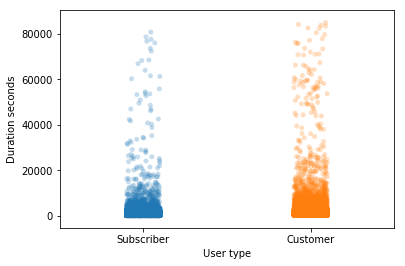

In [45]:
g = sb.stripplot(x=df["user_type"] , y=df['duration_sec'] , jitter=True , alpha = 0.25)
g.set_xlabel('User type')
g.set_ylabel('Duration seconds')
plt.show()

Looks like , Customers do tend to take a longer trip than the regular subscribers. It is pretty soon to establish whether the subscribers are regular and hence use for a smaller distance as compared to Customer who maybe recreational users hence the longer duration

Furthermore , I want to switch the focus and check Which gender takes more duration ? Why ? Because more duration means more revenue

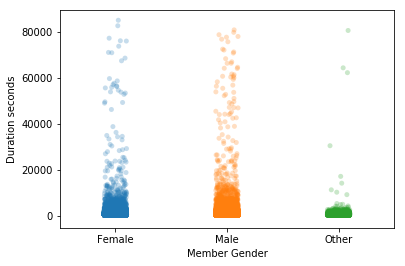

In [46]:
g = sb.stripplot(x=df["member_gender"] , y=df['duration_sec'] , jitter=True ,alpha = 0.25)
g.set_xlabel('Member Gender')
g.set_ylabel('Duration seconds')
plt.show()

There's not much to make difference per say. Males and Females are renting the bikes for a similar duration.

Hence , We can explore **Which gender are our subscribers?**

In [47]:
pd.crosstab(df["user_type"] , df['member_gender'])


member_gender,Female,Male,Other
user_type,,,
Customer,6144,13399,477
Subscriber,34322,116819,2525


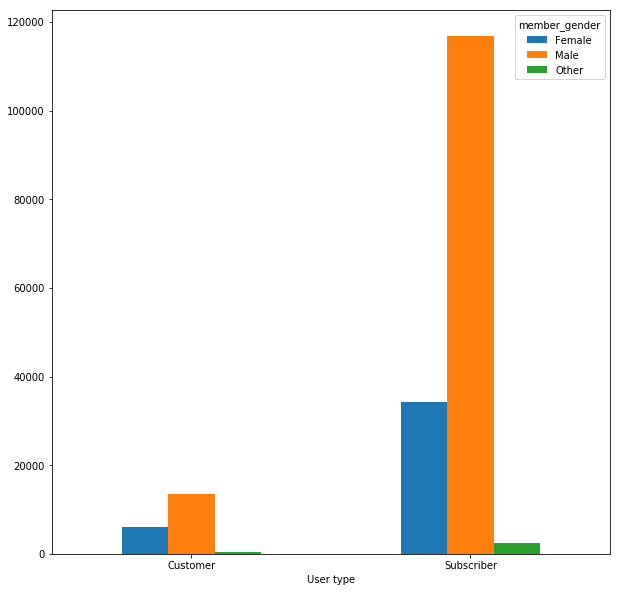

In [48]:
pd.crosstab(df["user_type"] , df['member_gender']).plot(kind = 'bar' , figsize = (10,10) , rot = 0).set(xlabel = 'User type')
plt.show()

One more interesting observation could be to check age of members as compared to the duration to see if there is a trend



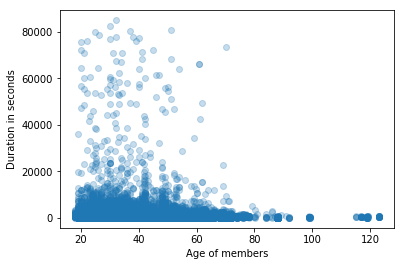

In [50]:
g = sb.regplot(x='member_age',
            y='duration_sec',
            data=df,
            fit_reg=False,  # do not fit a regression line
            x_jitter=0.1,  # could also dynamically set this with range of data
            y_jitter=0.1,
            scatter_kws={'alpha': 0.25 })
g.set_xlabel('Age of members')
g.set_ylabel('Duration in seconds')
plt.show()

Scatter plot , Proves that people above the age of 25 and below 45 tend to take the trip for a longer duration.

**Which brings us to our next question , What's the age according to gender ? Do younger male take the Bike share more than Younger females ? Let's find out**

In [51]:
pd.crosstab(df['member_age'] , df['member_gender'])

member_gender,Female,Male,Other
member_age,,,
18.0,14,43,0
19.0,177,605,3
20.0,303,1112,37
21.0,478,1934,29
22.0,657,2193,55
23.0,1467,3766,226
24.0,1820,5556,93
25.0,1764,6425,32
26.0,1977,6488,90


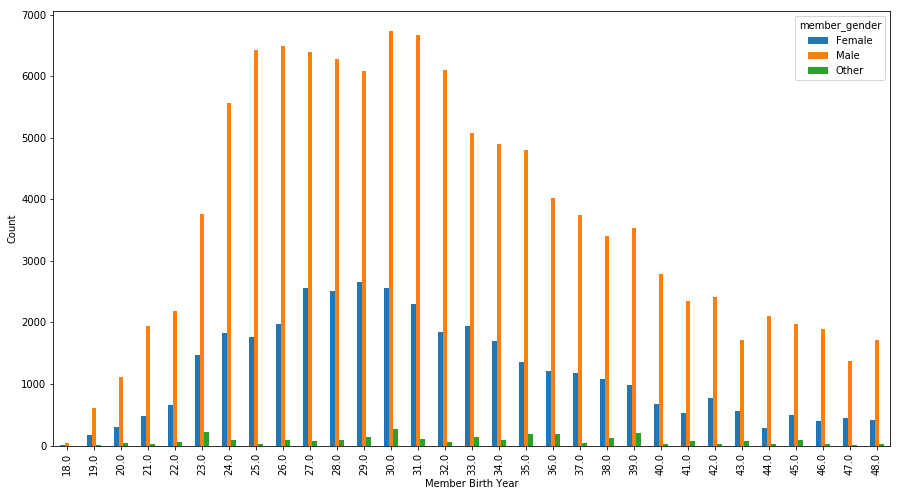

In [52]:
pd.crosstab(df.query('member_birth_year > 1970')['member_age'] ,
            df.query('member_birth_year > 1970')['member_gender']).plot(kind = 'bar' , figsize = (15 ,8)) 
plt.xlabel('Member Birth Year')
plt.ylabel('Count')
plt.show()

Both the gender show similar trends when it comes to age wise comparison. Females of the age 28 take the highest amount of rides whilst Males of the age 30 seem to care more about their fitness.

**Let's take a look at the user type through the age. Do young users subscribe to our services as compared to the old users?**

In [53]:
pd.crosstab(df['member_age'] , df['user_type'])

user_type,Customer,Subscriber
member_age,,
18.0,57,0
19.0,362,423
20.0,352,1100
21.0,370,2071
22.0,477,2428
23.0,682,4777
24.0,793,6676
25.0,848,7373
26.0,899,7656


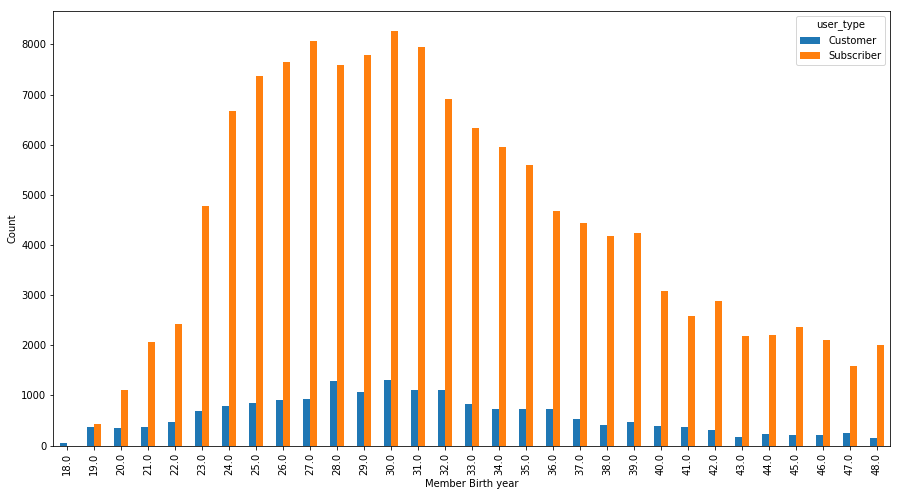

In [54]:
pd.crosstab(df.query('member_birth_year > 1970')['member_age'] ,
            df.query('member_birth_year > 1970')['user_type']).plot(kind = 'bar' , figsize = (15 ,8))
plt.xlabel('Member Birth year')
plt.ylabel('Count')
plt.show()

We can see that 30 year old have the highest for Customers as well as Subscribers.

Since we are looking more about the users , We may also want to know **who share their rides the most ?**

In [55]:
pd.crosstab(df['bike_share_for_all_trip'] , df['member_gender'])

member_gender,Female,Male,Other
bike_share_for_all_trip,,,
No,36963,117997,2583
Yes,3503,12221,419


In [56]:
pd.crosstab(df['bike_share_for_all_trip'] , df['user_type'])

user_type,Customer,Subscriber
bike_share_for_all_trip,,
No,25489,140518
Yes,0,16143


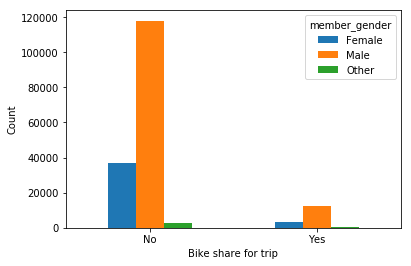

In [57]:
pd.crosstab(df['bike_share_for_all_trip'] , df['member_gender']).plot(kind = 'bar' , rot = 0)
plt.xlabel('Bike share for trip')
plt.ylabel('Count')
plt.show()

Bike sharers are pretty low , There is no conclusive difference out here!

This part is crucial as it would enable us to find more about the user habits and can help us in advertising or looking out for target customers

First thing , We want to find is Based on the members gender and user type which particular type of users take more ride.

We are going ahead with the boxplot in this section , Since we want to find the averaging cause. We have a population data where the male riders are more in amount and it would be pretty unfair to only target Male customers on that note

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


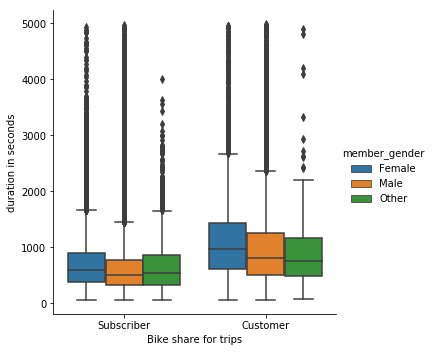

In [59]:
g = sb.factorplot(x='user_type', y='duration_sec', hue='member_gender', kind='box',
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('Bike share for trips')
g.set_ylabels('duration in seconds')
plt.show()


As we can see here , Female customers tend to travel more in duration than Male Customers in terms of the Boxplot. Infact , This trend can also be noticed in the Subscriber too. Another pretty important thing we can observe is Female customers tend to take more duration than Female subscribers

**One of the interesting plot could be to see behavorial aspect in terms of the day of the week. We would be able to check a certain trend**

**We now want to see whether the day has any impact from the above ?**

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


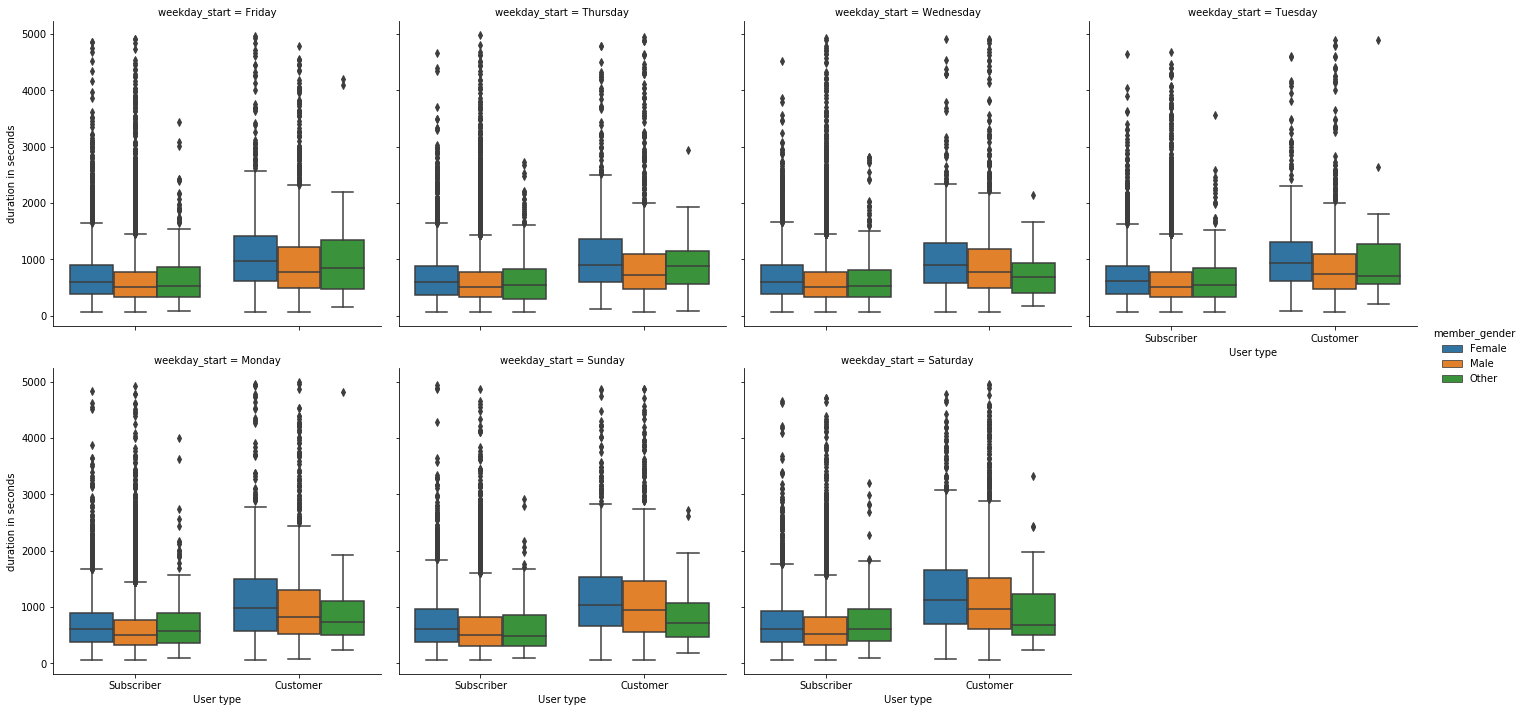

In [60]:
g = sb.factorplot(x="user_type", y="duration_sec",col = 'weekday_start',hue="member_gender",col_wrap=4, kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('User type')
g.set_ylabels('duration in seconds')
plt.show()

**in terms of the above figure** , We can see that Male customers as well as Female customers tend to have a longer duration on Saturday and Sunday.

This particular trend can be super useful. We can expect higher duration of rides on Saturday and Sunday even though the numbers on the particular days are low.

Looks like the trend is similar in terms of user types for Male and Female.

**Who shares the ride ? and on what day?**

This again can be pretty useful for us to cope up with the expectation level of the customer and advertising. Maybe in terms of a scheme that on a particular day you get some 10% discount in order to hike up the numbers. Also , The gender type can give a bit of a targeting mechanism.



/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


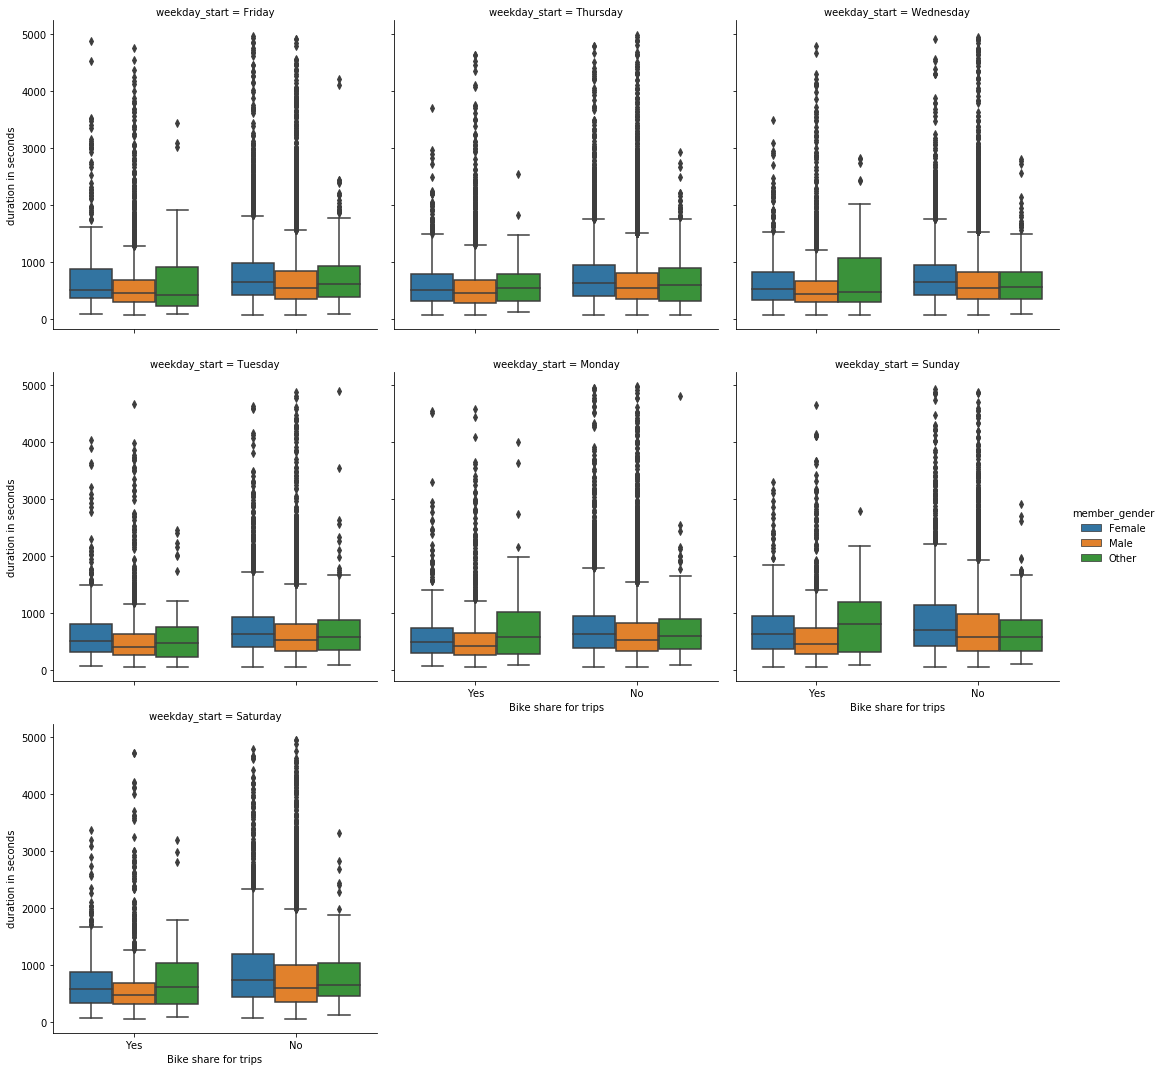

In [61]:
g = sb.factorplot(y="duration_sec",col = 'weekday_start',col_wrap= 3 ,x = 'bike_share_for_all_trip' ,hue="member_gender", kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('Bike share for trips')
g.set_ylabels('duration in seconds')
plt.show()

Ride share duration increases on Saturday and Sunday , a well known fact from the above analysis. We can also see that Female ride sharers tend to spend more duration on the weekends similar to other gender and Males. We can even take a look at the duration in seconds in terms of age

**In terms of the user types and Gender , We may want to see the distribution of data when we compare to the age to get a good sense of idea**

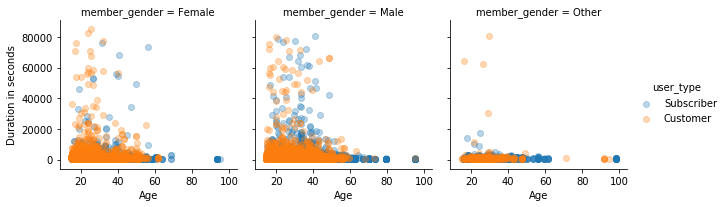

In [62]:
g = sb.FacetGrid(data=df ,col = 'member_gender' , hue = 'user_type')
g.map(plt.scatter , 'member_age','duration_sec' , alpha = 0.3).add_legend()
g.set_xlabels('Age')
g.set_ylabels('Duration in seconds')
g.set_xticklabels()
plt.show()

### Particular day trend ?
A good observation point was to find when has there been more rides ? We can actually see that there has been more ridership on a particular day of the week. Which brought us to the following plot.

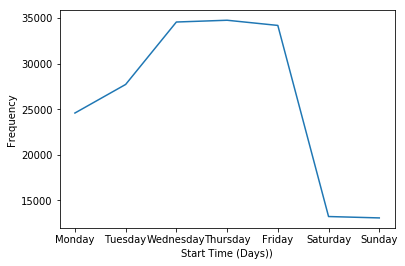

In [63]:
## A list of days in the order that you need them:
dayofweek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']   

## Name the series to be plotted (allows you to access the index later):
day_counts = df.start_time.dt.dayofweek.map(dayofweek).value_counts()

## Re order the series index:
day_counts = day_counts.reindex(index = days)

## Plot the series:
a = day_counts.plot(kind = 'line')

# use index as tick labels
a.set_xticks(range(len(day_counts.index)))
a.set_xticklabels(day_counts.index)
a.set_xlabel('Start Time (Days))')
a.set_ylabel('Frequency')
plt.show()

In the following plot , We can see that the ridership increases in the midweek. People tend to use our service more on the Wednesday and Thursday. Whilst the ridership touches a low on Saturday and Sunday. We can offer discounts and offers on Saturday and Sunday in order to increase ridership. This would enable us to create more revenue and even more rides. While wednesday seems to be a day where the ride touches the peak. Hence our service officials must be prepared for the mid week rush

### Knowing more about our users.

From a Sales persepective. It is important to know about the target customer. But it's even important to know whether the customers are regulars or just causual users. Subscribers tend to generate more revenue. But a good start would be to know the age of the customers.

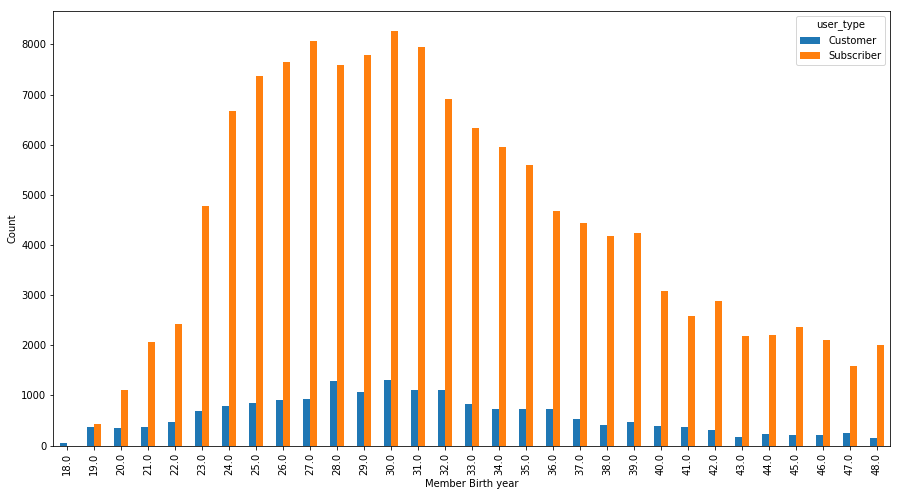

In [64]:
pd.crosstab(df.query('member_birth_year > 1970')['member_age'] ,
            df.query('member_birth_year > 1970')['user_type']).plot(kind = 'bar' , figsize = (15 ,8))
plt.xlabel('Member Birth year')
plt.ylabel('Count')
plt.show()

In our case , We can see that people above the age of 24 and below 34 tend to be our subscribers in a higher amount. This can be our target audience in order to lure them to subscribe with us.

We also saw a spike of growth for people of the age 30 and 31. Looks like people hitting their 30s really love our services. Hence our target must be on that range. Digital marketing through social media can be a good start to increase the amount of subscribers.

#### Which day and user type are more profitable for us ?

So far we looked in terms of day and age. We now know that wednesday tends to have more rides and ages at around 30 can be targeted. In this plot , we would see who spend more duration. More duration means more revenue in simple terms. This can help us not only in the target audience aspect but also to understand the days at which the duration were more for the specific genders



/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


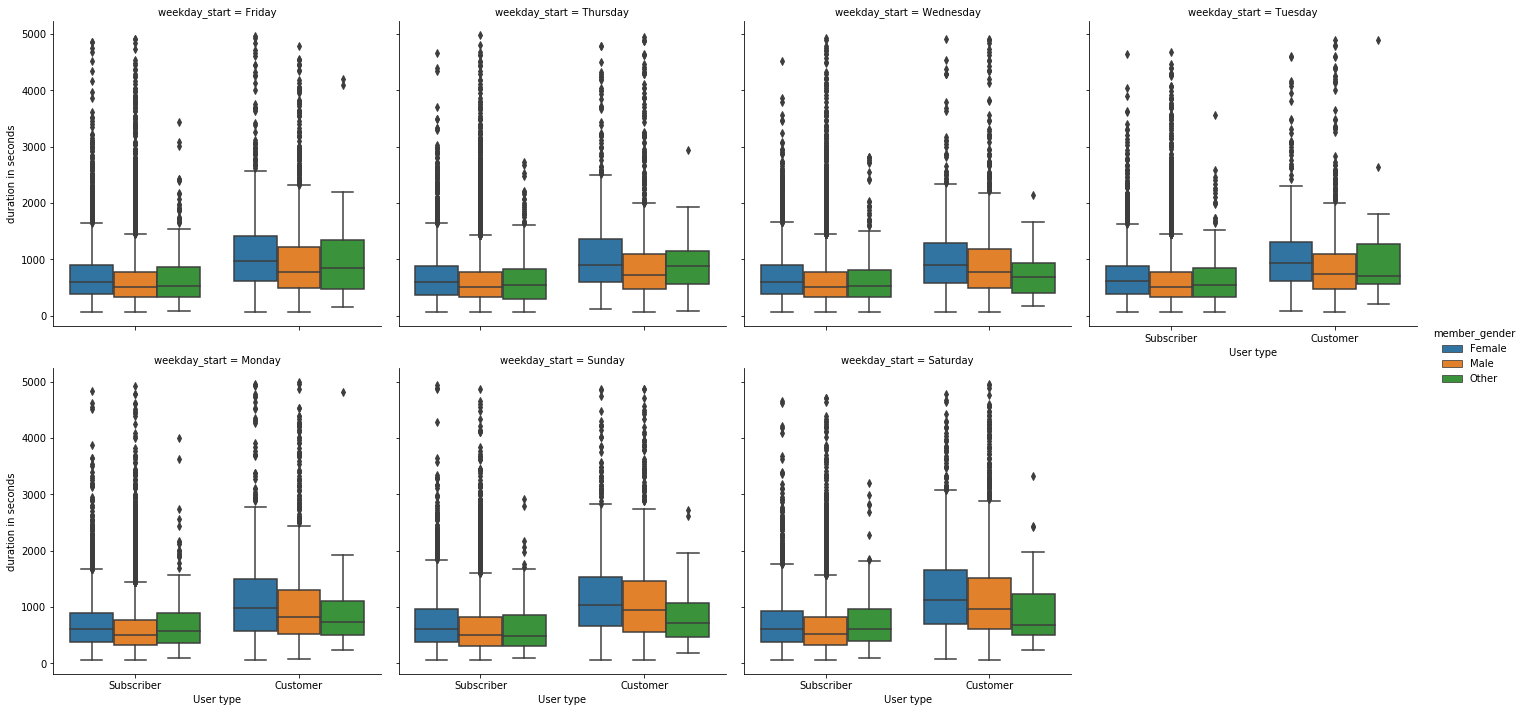

In [65]:
g = sb.factorplot(x="user_type", y="duration_sec",col = 'weekday_start',hue="member_gender",col_wrap=4, kind="box",
                  data=df.query('duration_sec < 5000'))
g.set_xlabels('User type')
g.set_ylabels('duration in seconds')
plt.show()